1 Week (self learn):

# ML:
1. Gradient Descent
2. Back Propagation
3. Forward Propagation
4. Loss Functions

# Models:
1. Random Forest / XGboost
2. CNN Convolutional Neural Network (segmentation/classification)
3. RNN/LSTM (Recurrent Neural Network) (Long short-term memory) - Senitment

Words ---> Vectors.  (RNN, LSTM, Transformers) - Classification problem - Supervised learning - Sentiment Analyssis

5. Transformers (LLM)
6. PCA/SVD
7. Ranking Problems (optimization)
8. Why Bayesian models suck. Maybe ok for statistical (LDA)

# Data Pre-Processing Tutorial

In [1]:
# Third-party libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Introduction to Data Preprocessing

In [36]:
from sklearn.datasets import fetch_california_housing


In [40]:
fetch_california_housing().keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [188]:
housing = fetch_california_housing()

In [189]:
pd.DataFrame({
    1:[1,23,3,2],
    3:['we','ew','u','i']
})

,1,3
0,1,we
1,23,ew
2,3,u
3,2,i


In [190]:
housing['feature_names']

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [191]:
df = pd.DataFrame(housing['data'], columns=housing['feature_names'])
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [195]:
housing.get('target')

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [196]:
# Creating a new column
df['MedHouseValue'] = housing.get('target')

In [197]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [7]:
# Exercise 1: Display the dimensions of the dataset and list all the column names.
df.shape

(20640, 9)

In [8]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseValue'],
      dtype='object')

In [298]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [300]:
# Exercise 2: Identify the data types of each column and count how many features are numerical and how many are categorical.
df.dtypes

MedInc           float64
HouseAge         float64
AveRooms         float64
AveBedrms        float64
Population       float64
AveOccup         float64
Latitude         float64
Longitude        float64
MedHouseValue    float64
dtype: object

In [15]:
df.select_dtypes?

Signature: df.select_dtypes(include=None, exclude=None) -> 'Self'
Docstring:
Return a subset of the DataFrame's columns based on the column dtypes.

Parameters
----------
include, exclude : scalar or list-like
    A selection of dtypes or strings to be included/excluded. At least
    one of these parameters must be supplied.

Returns
-------
DataFrame
    The subset of the frame including the dtypes in ``include`` and
    excluding the dtypes in ``exclude``.

Raises
------
ValueError
    * If both of ``include`` and ``exclude`` are empty
    * If ``include`` and ``exclude`` have overlapping elements
    * If any kind of string dtype is passed in.

See Also
--------
DataFrame.dtypes: Return Series with the data type of each column.

Notes
-----
* To select all *numeric* types, use ``np.number`` or ``'number'``
* To select strings you must use the ``object`` dtype, but note that
  this will return *all* object dtype columns
* See the `numpy dtype hierarchy
  <https://numpy.org/doc/stable

In [71]:
num_numerical = df.select_dtypes(include=[np.number]).shape[1]

In [72]:
num_numerical

8

In [77]:
num_categorical = df.select_dtypes(include=['category']).shape[1]

In [79]:
print(f"Numerical features: {num_numerical}, Categorical features: {num_categorical}")

Numerical features: 8, Categorical features: 0


In [80]:
# Exercise 3: Check for missing values in the dataset. If any, provide the number of missing values per column.
missing_values = df.isnull().sum()

In [132]:
ex_df = pd.DataFrame({
    'col1':[1,np.nan,3,2],
    'col2':['we','ew',None,'i'],
    'col3':['we','ew',None,'i']
})

In [134]:
ex_df.isnull()

,col1,col2,col3
0,False,False,False
1,True,False,False
2,False,True,True
3,False,False,False


In [135]:
ex_df.shape

(4, 3)

In [136]:
# 2 Dimensional Object
ex_df[['col1']].shape

(4, 1)

In [137]:
# 1 Dimensional Object
ex_df['col1'].shape

(4,)

In [106]:
ex_df.isnull().sum()

col1    1
col2    1
dtype: int64

In [105]:
ex_df.isnull().sum().shape

(2,)

In [140]:
ex_df.isnull().sum(axis=1).shape

(4,)

In [187]:
df.isnull()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
20635,False,False,False,False,False,False,False,False
20636,False,False,False,False,False,False,False,False
20637,False,False,False,False,False,False,False,False
20638,False,False,False,False,False,False,False,False


In [89]:
df.isnull().sum(axis=1)

0        0
1        0
2        0
3        0
4        0
        ..
20635    0
20636    0
20637    0
20638    0
20639    0
Length: 20640, dtype: int64

In [141]:
type(missing_values)

pandas.core.series.Series

In [158]:
# Exercise 4: Generate a statistical summary for all numerical features (mean, median, standard deviation, etc.).

df_desc = df.describe()
df_desc

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [162]:
# How to determine average std-dev across all columns?
df_desc.loc['std',:].mean()

145.55263984684888

In [164]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [170]:
df_desc

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [185]:
# iloc = index location slicing
df_desc.iloc[-1,:]

MedInc           15.000100
HouseAge         52.000000
AveRooms        141.909091
AveBedrms        34.066667
Population    35682.000000
AveOccup       1243.333333
Latitude         41.950000
Longitude      -114.310000
Name: max, dtype: float64

In [198]:
df['MedHouseValue']

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseValue, Length: 20640, dtype: float64

In [201]:
sns.histplot?

Signature:
sns.histplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    weights=None,
    stat='count',
    bins='auto',
    binwidth=None,
    binrange=None,
    discrete=None,
    cumulative=False,
    common_bins=True,
    common_norm=True,
    multiple='layer',
    element='bars',
    fill=True,
    shrink=1,
    kde=False,
    kde_kws=None,
    line_kws=None,
    thresh=0,
    pthresh=None,
    pmax=None,
    cbar=False,
    cbar_ax=None,
    cbar_kws=None,
    palette=None,
    hue_order=None,
    hue_norm=None,
    color=None,
    log_scale=None,
    legend=True,
    ax=None,
    **kwargs,
)
Docstring:
Plot univariate or bivariate histograms to show distributions of datasets.

A histogram is a classic visualization tool that represents the distribution
of one or more variables by counting the number of observations that fall within
discrete bins.

This function can normalize the statistic computed within each bin to estimate
frequency, density or probability mas

In [208]:
df['MedHouseValue'].sort_values().value_counts()

MedHouseValue
5.00001    965
1.37500    122
1.62500    117
1.12500    103
1.87500     93
          ... 
3.83000      1
3.83100      1
3.83200      1
0.36600      1
0.56300      1
Name: count, Length: 3842, dtype: int64

/Users/bipinaasi/aidi-1100/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of MedHouseValue')

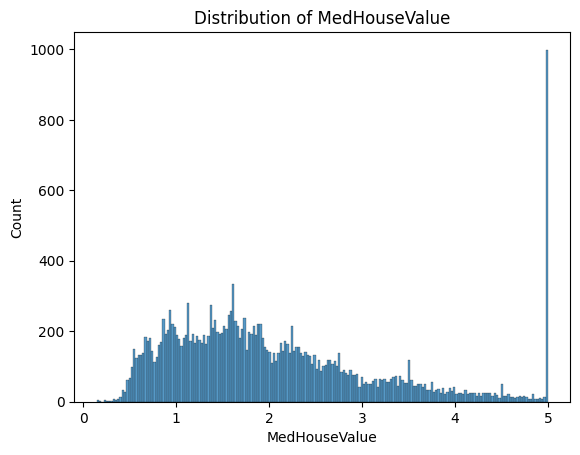

In [216]:
# Exercise 5: Plot the distribution of the target variable 'MedHouseValue' (Median house value).
ax = sns.histplot(df['MedHouseValue'],bins=200)
ax.set_title('Distribution of MedHouseValue')

In [241]:
ex_df = pd.DataFrame(
    {
    'col1':[1,2,3,4,5,6],
    'col2':[6,5,4,3,2,1],
    'col3':[4.01,4,4,4,4,4],
})

In [242]:
ex_df[['col3','col1']]

,col3,col1
0,4.01,1
1,4.00,2
2,4.00,3
3,4.00,4
4,4.00,5
5,4.00,6


In [247]:
ex_df.corr()

,col1,col2,col3
col1,1.000000,-1.000000,-0.654654
col2,-1.000000,1.000000,0.654654
col3,-0.654654,0.654654,1.000000


<Axes: xlabel='col1', ylabel='col1'>

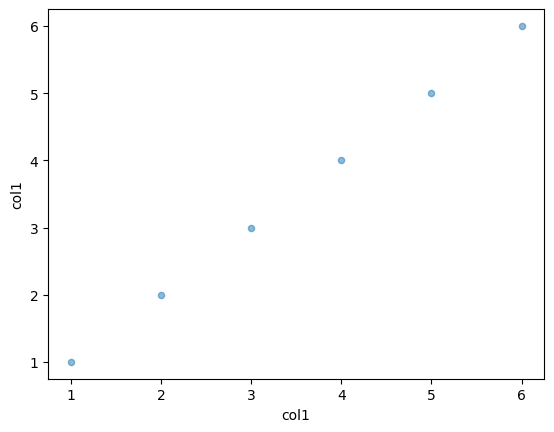

In [251]:
ex_df.plot.scatter(x="col1", y="col1", alpha=0.5)

<Axes: xlabel='col2', ylabel='col2'>

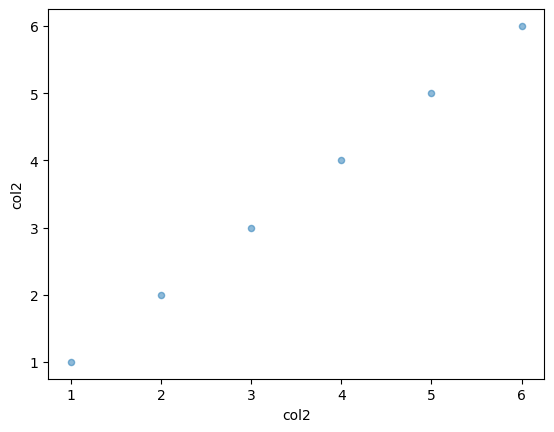

In [252]:
ex_df.plot.scatter(x="col2", y="col2", alpha=0.5)

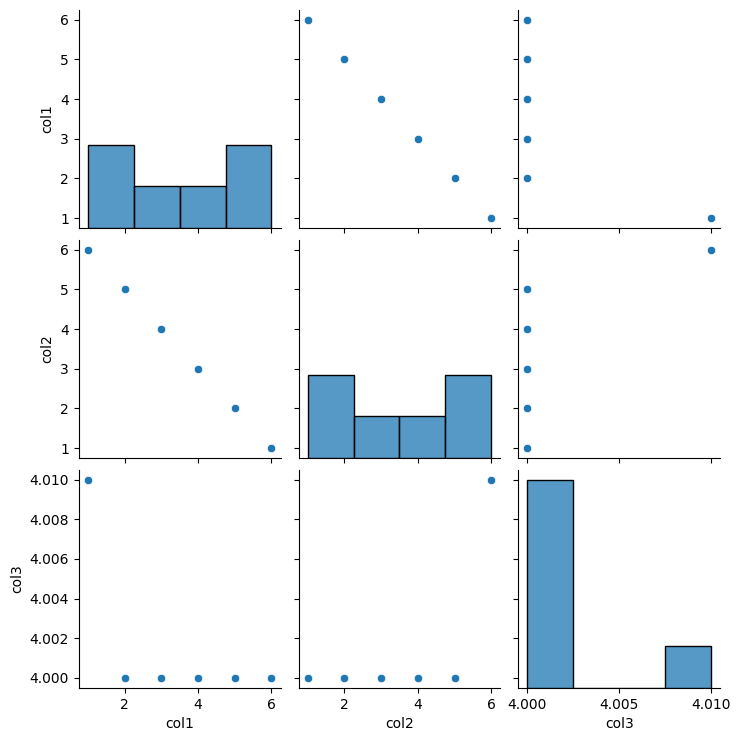

In [249]:
import warnings
warnings.filterwarnings('ignore')

sns.pairplot(ex_df)

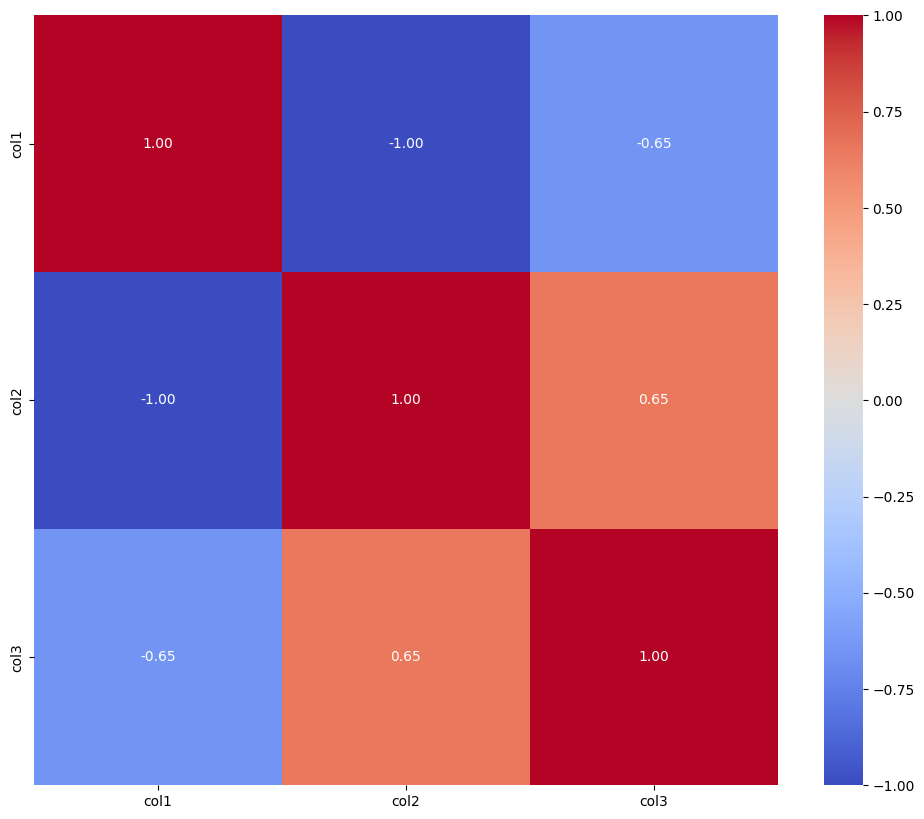

In [254]:
# Exercise 6: Create a correlation matrix heatmap for the dataset.

plt.figure(figsize=(12, 10))
sns.heatmap(ex_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

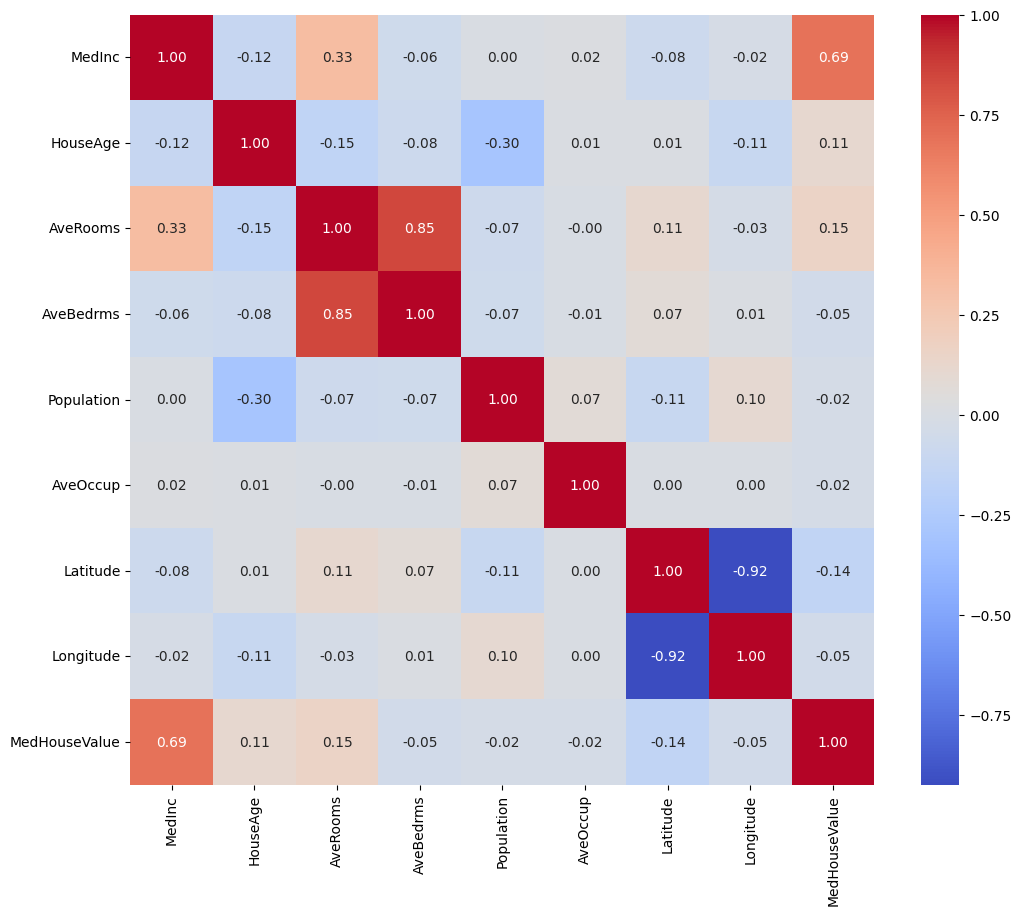

In [34]:
# Exercise 6: Create a correlation matrix heatmap for the dataset.

plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

In [35]:
# Exercise 7: Identify the top 3 features that have the highest positive correlation with 'MedHouseValue'.

correlations = df.corr()['MedHouseValue'].sort_values(ascending=False)
top_3_features = correlations.index[1:4]
print("Top 3 features positively correlated with MedHouseValue:", top_3_features.tolist())

Top 3 features positively correlated with MedHouseValue: ['MedInc', 'AveRooms', 'HouseAge']


In [256]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MedInc         20640 non-null  float64
 1   HouseAge       20640 non-null  float64
 2   AveRooms       20640 non-null  float64
 3   AveBedrms      20640 non-null  float64
 4   Population     20640 non-null  float64
 5   AveOccup       20640 non-null  float64
 6   Latitude       20640 non-null  float64
 7   Longitude      20640 non-null  float64
 8   MedHouseValue  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [258]:
import seaborn as sns
import pandas as pd


In [259]:
titanic_df = sns.load_dataset('titanic')


In [262]:
titanic_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [282]:
titanic_df['adult_male'].astype(int)

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: adult_male, Length: 891, dtype: int64

In [274]:
# astype lets you convert data types
titanic_df['adult_male'].astype(int)

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: adult_male, Length: 891, dtype: int64

In [280]:
# Sex does not have order associated with it. Cannot rank.
pd.get_dummies(titanic_df['sex'])

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
886,False,True
887,True,False
888,True,False
889,False,True


In [285]:
pd.get_dummies?

Signature:
pd.get_dummies(
    data,
    prefix=None,
    prefix_sep: 'str | Iterable[str] | dict[str, str]' = '_',
    dummy_na: 'bool' = False,
    columns=None,
    sparse: 'bool' = False,
    drop_first: 'bool' = False,
    dtype: 'NpDtype | None' = None,
) -> 'DataFrame'
Docstring:
Convert categorical variable into dummy/indicator variables.

Each variable is converted in as many 0/1 variables as there are different
values. Columns in the output are each named after a value; if the input is
a DataFrame, the name of the original variable is prepended to the value.

Parameters
----------
data : array-like, Series, or DataFrame
    Data of which to get dummy indicators.
prefix : str, list of str, or dict of str, default None
    String to append DataFrame column names.
    Pass a list with length equal to the number of columns
    when calling get_dummies on a DataFrame. Alternatively, `prefix`
    can be a dictionary mapping column names to prefixes.
prefix_sep : str, default '_'
  

In [284]:
# Class has an order associated with it. Can rank.
pd.get_dummies(titanic_df['class']).astype(int)

,First,Second,Third
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
...,...,...,...
886,0,1,0
887,1,0,0
888,0,0,1
889,1,0,0


array([[<Axes: title={'center': 'sibsp'}>,
        <Axes: title={'center': 'parch'}>]], dtype=object)

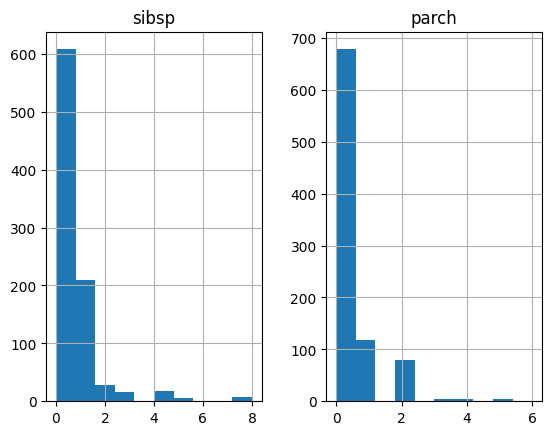

In [291]:
titanic_df[['sibsp','parch']].hist()

In [296]:
titanic_df['family_size'] = titanic_df['sibsp'] + titanic_df['parch']

In [297]:
titanic_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,family_size
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,0
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,0
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,3
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,0
